In [2]:
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter
sep = os.sep

In [3]:
os.chdir('C:\\Projects\\ature\\')
# unet-drive.WEIGHTED.chk.tar.csv
# unet-drive.WEIGHTED.chk.tar-TEST.csv
# unet-drive.FISHING.chk.tar.csv
# unet-drive.UNWEIGHTED.chk.tar.csv
# unet-drive.UNWEIGHTED.chk.tar-TEST.csv

In [56]:
train_val = pd.read_csv('net_logs'+sep+'unet-drive.UNWEIGHTED.chk.tar.csv', index_col='TYPE')
val = train_val.query('TYPE==1')
T_val = np.arange(val.shape[0])
train = train_val.query('TYPE==0')
T_train =np.arange(train.shape[0])
test= pd.read_csv('net_logs'+sep+'unet-drive.UNWEIGHTED.chk.tar-TEST.csv', index_col='TYPE')
T_test = np.arange(test.shape[0])

In [57]:
train_val1 = pd.read_csv('net_logs'+sep+'unet-drive.WEIGHTED.chk.tar.csv', index_col='TYPE')
val1 = train_val1.query('TYPE==1')
T_val1 = np.arange(val1.shape[0])
train1 = train_val1.query('TYPE==0')
T_train1 =np.arange(train1.shape[0])
test1= pd.read_csv('net_logs'+sep+'unet-drive.WEIGHTED.chk.tar-TEST.csv', index_col='TYPE')
T_test1 = np.arange(test1.shape[0])

In [58]:
train_val2 = pd.read_csv('net_logs'+sep+'unet-drive.FISHING.chk.tar.csv', index_col='TYPE')
val2 = train_val2.query('TYPE==1')
T_val2 = np.arange(val2.shape[0])
train2 = train_val2.query('TYPE==0')
T_train2 =np.arange(train2.shape[0])
test2= pd.read_csv('net_logs'+sep+'unet-drive.FISHING.chk.tar-TEST.csv', index_col='TYPE')
T_test2 = np.arange(test2.shape[0])

In [59]:
val2.shape

(2500, 8)

### Validation Precision-Recall

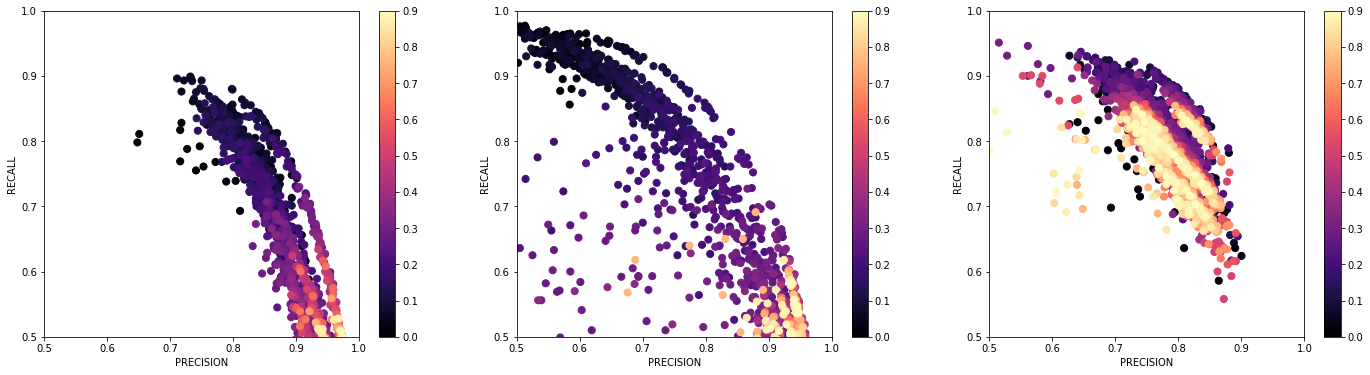

In [60]:
plt.rcParams["figure.figsize"] = [24,6]
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
z = np.linspace(0,0.9, val['PRECISION'].shape[0])
z1 = np.linspace(0,0.9, val1['PRECISION'].shape[0])
z2 = np.linspace(0,0.9, val2['PRECISION'].shape[0])
plots = val.plot.scatter(x='PRECISION', y='RECALL', c=z, colormap='magma', ax=ax1, s=50, xlim=(0.5,1), ylim=(0.5,1))
plots = val1.plot.scatter(x='PRECISION', y='RECALL', c=z1, colormap='magma', ax=ax2, s=50,  xlim=(0.5,1), ylim=(0.5,1))
plots = val2.plot.scatter(x='PRECISION', y='RECALL', c=z2, colormap='magma', ax=ax3, s=50,  xlim=(0.5,1), ylim=(0.5,1))
plt.show()

### Validation F1 Score

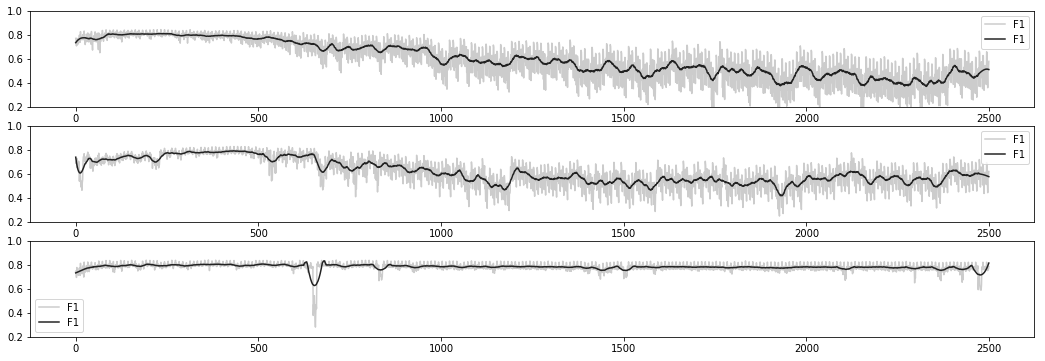

In [61]:
plt.rcParams["figure.figsize"] = [18,6]
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)
df, df1, df2 = val.copy(), val1.copy(), val2.copy()
df['F1'] = savgol_filter(df['F1'], 51, 3)
df1['F1'] = savgol_filter(df1['F1'], 51, 3)
df2['F1'] = savgol_filter(df2['F1'], 51, 3)
plots = val.plot(y='F1', x=T_val, c='#cccccc', ax=ax1,ylim=(0.2,1))
plots = df.plot(y='F1', x=T_val, c='#222222', ax=ax1,ylim=(0.2,1))
plots = val1.plot(y='F1', x=T_val1, c='#cccccc', ax=ax2,ylim=(0.2,1))
plots = df1.plot(y='F1', x=T_val1, c='#222222', ax=ax2,ylim=(0.2,1))
plots = val2.plot(y='F1', x=T_val2, c='#cccccc', ax=ax3,ylim=(0.2,1))
plots = df2.plot(y='F1', x=T_val2, c='#222222', ax=ax3,ylim=(0.2,1))
plt.show()

### Validation Accuracy

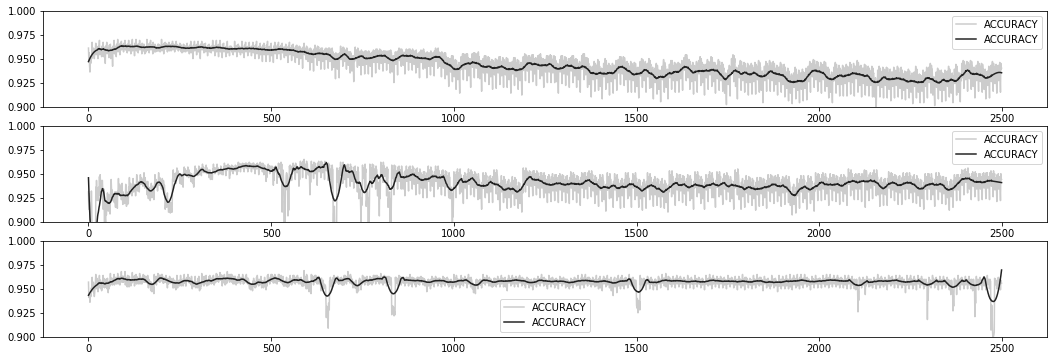

In [62]:
plt.rcParams["figure.figsize"] = [18,6]
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)
df, df1, df2 = val.copy(), val1.copy(), val2.copy()
df['ACCURACY'] = savgol_filter(df['ACCURACY'], 51, 3)
df1['ACCURACY'] = savgol_filter(df1['ACCURACY'], 51, 3)
df2['ACCURACY'] = savgol_filter(df2['ACCURACY'], 51, 3)
plots = val.plot(y='ACCURACY', x=T_val, c='#cccccc', ax=ax1, ylim=(0.9,1))
plots = df.plot(y='ACCURACY', x=T_val, c='#222222', ax=ax1, ylim=(0.9,1))
plots = val1.plot(y='ACCURACY', x=T_val1, c='#cccccc', ax=ax2, ylim=(0.9,1))
plots = df1.plot(y='ACCURACY', x=T_val1, c='#222222', ax=ax2, ylim=(0.9,1))
plots = val2.plot(y='ACCURACY', x=T_val2, c='#cccccc', ax=ax3, ylim=(0.9,1))
plots = df2.plot(y='ACCURACY', x=T_val2, c='#222222', ax=ax3, ylim=(0.9,1))
plt.show()

### Training F1 Score

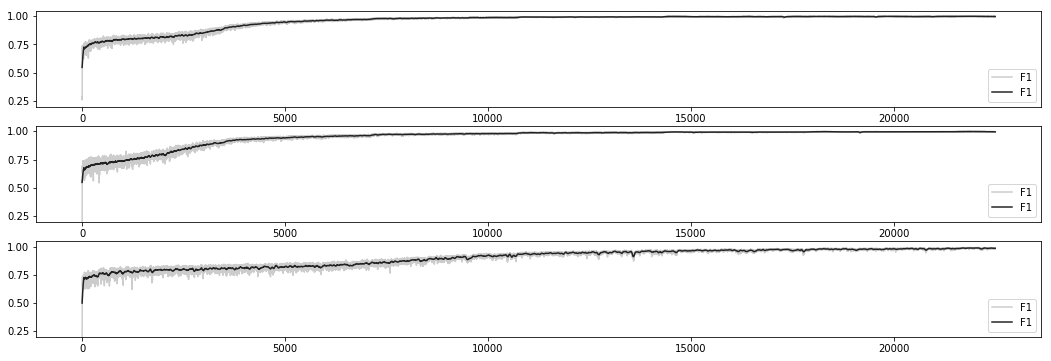

In [63]:
plt.rcParams["figure.figsize"] = [18,6]
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)
df, df1, df2 = train.copy(), train1.copy(), train2.copy()
df['F1'] = savgol_filter(df['F1'], 91, 2)
df1['F1'] = savgol_filter(df1['F1'], 91, 2)
df2['F1'] = savgol_filter(df2['F1'], 91, 2)
plots = train.plot(y='F1', x=T_train, c='#cccccc', ax=ax1, ylim=(0.2,1.05))
plots = df.plot(y='F1', x=T_train, c='#222222', ax=ax1, ylim=(0.2,1.05))
plots = train1.plot(y='F1', x=T_train1, c='#cccccc', ax=ax2, ylim=(0.2,1.05))
plots = df1.plot(y='F1', x=T_train1, c='#222222', ax=ax2, ylim=(0.2,1.05))
plots = train2.plot(y='F1', x=T_train2, c='#cccccc', ax=ax3, ylim=(0.2,1.05))
plots = df2.plot(y='F1', x=T_train2, c='#222222', ax=ax3, ylim=(0.2,1.05))
plt.show()

### Training precision-recall

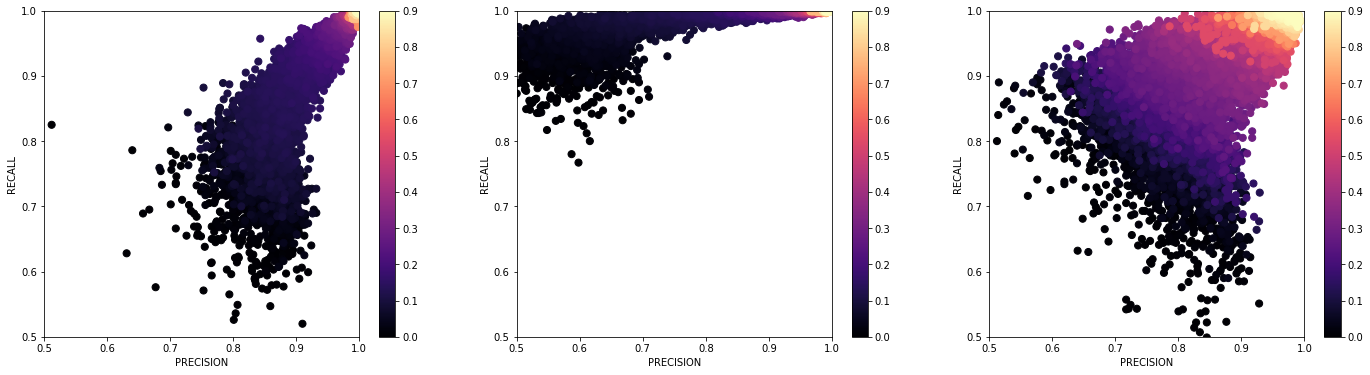

In [64]:
plt.rcParams["figure.figsize"] = [24,6]
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
z = np.linspace(0,0.9, train['PRECISION'].shape[0])
z1 = np.linspace(0,0.9, train1['PRECISION'].shape[0])
z2 = np.linspace(0,0.9, train2['PRECISION'].shape[0])
plots = train.plot.scatter(x='PRECISION', y='RECALL', c=z, colormap='magma', ax=ax1, s=50, xlim=(0.5,1), ylim=(0.5,1))
plots = train1.plot.scatter(x='PRECISION', y='RECALL', c=z1, colormap='magma', ax=ax2, s=50,  xlim=(0.5,1), ylim=(0.5,1))
plots = train2.plot.scatter(x='PRECISION', y='RECALL', c=z2, colormap='magma', ax=ax3, s=50,  xlim=(0.5,1), ylim=(0.5,1))
plt.show()

### Training loss

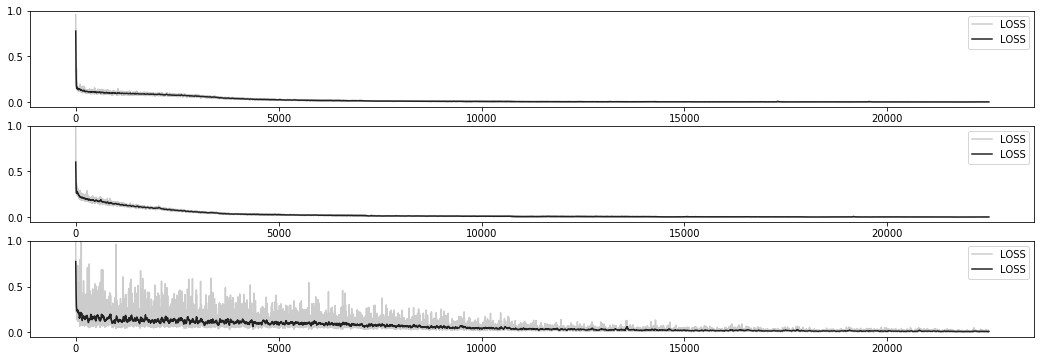

In [65]:
plt.rcParams["figure.figsize"] = [18,6]
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)
df, df1, df2 = train.copy(), train1.copy(), train2.copy()
df['LOSS'] = savgol_filter(df['LOSS'], 51, 3)
df1['LOSS'] = savgol_filter(df1['LOSS'], 51, 3)
df2['LOSS'] = savgol_filter(df2['LOSS'], 51, 3)
plots = train.plot(y='LOSS', x=T_train, c='#cccccc', ax=ax1, ylim=(-0.05,1))
plots = df.plot(y='LOSS', x=T_train, c='#222222', ax=ax1, ylim=(-0.05,1))
plots = train1.plot(y='LOSS', x=T_train1, c='#cccccc', ax=ax2, ylim=(-0.05,1))
plots = df1.plot(y='LOSS', x=T_train1, c='#222222', ax=ax2, ylim=(-0.05,1))
plots = train2.plot(y='LOSS', x=T_train2, c='#cccccc', ax=ax3, ylim=(-0.05,1))
plots = df2.plot(y='LOSS', x=T_train2, c='#222222', ax=ax3, ylim=(-0.05,1))
plt.show()

### Training Accuracy

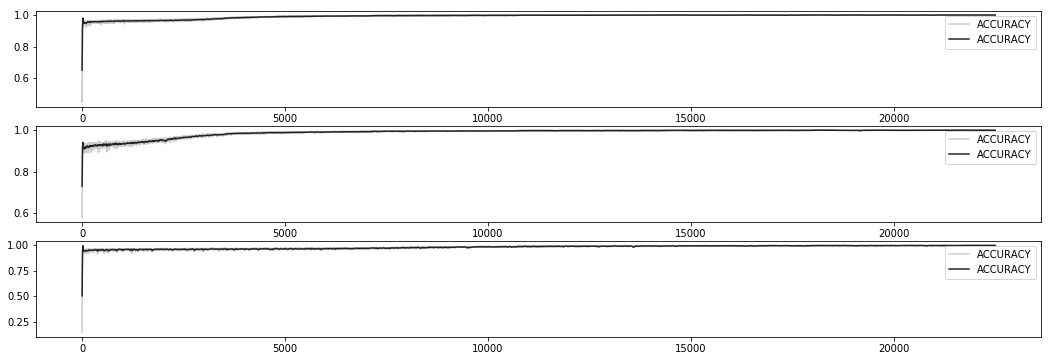

In [66]:
plt.rcParams["figure.figsize"] = [18,6]
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)
df, df1, df2 = train.copy(), train1.copy(), train2.copy()
df['ACCURACY'] = savgol_filter(df['ACCURACY'], 51, 3)
df1['ACCURACY'] = savgol_filter(df1['ACCURACY'], 51, 3)
df2['ACCURACY'] = savgol_filter(df2['ACCURACY'], 51, 3)
plots = train.plot(y='ACCURACY', x=T_train, c='#cccccc', ax=ax1)
plots = df.plot(y='ACCURACY', x=T_train, c='#222222', ax=ax1)
plots = train1.plot(y='ACCURACY', x=T_train1, c='#cccccc', ax=ax2)
plots = df1.plot(y='ACCURACY', x=T_train1, c='#222222', ax=ax2)
plots = train2.plot(y='ACCURACY', x=T_train2, c='#cccccc', ax=ax3)
plots = df2.plot(y='ACCURACY', x=T_train2, c='#222222', ax=ax3)
plt.show()

### TEST F1 Score

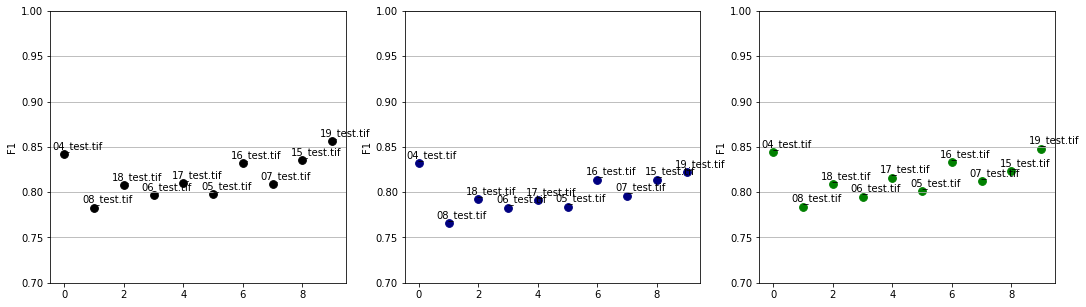

In [67]:
plt.rcParams["figure.figsize"] = [18,5]
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.scatter(T_test, test['F1'], color='black', s=60)
for i, txt in enumerate(test['ID']):
    ax1.annotate(txt, (T_test[i], test['F1'].iloc[i]), xytext=(T_test[i]-0.4, test['F1'].iloc[i]+0.006))
ax1.set_ylabel('F1')
ax1.set_ylim(0.7, 1)
ax1.grid(True, axis='y')

ax2.scatter(T_test1, test1['F1'], color='navy', s=60)
for i, txt in enumerate(test1['ID']):
    ax2.annotate(txt, (T_test1[i], test1['F1'].iloc[i]), xytext=(T_test1[i]-0.4, test1['F1'].iloc[i]+0.006))
ax2.set_ylabel('F1')
ax2.set_ylim(0.7, 1)
ax2.grid(True, axis='y')

ax3.scatter(T_test2, test2['F1'], color='green', s=60)
for i, txt in enumerate(test2['ID']):
    ax3.annotate(txt, (T_test2[i], test2['F1'].iloc[i]), xytext=(T_test2[i]-0.4, test2['F1'].iloc[i]+0.006))
ax3.set_ylabel('F1')
ax3.set_ylim(0.7, 1)
ax3.grid(True, axis='y')
plt.show()

### TEST precision-recall

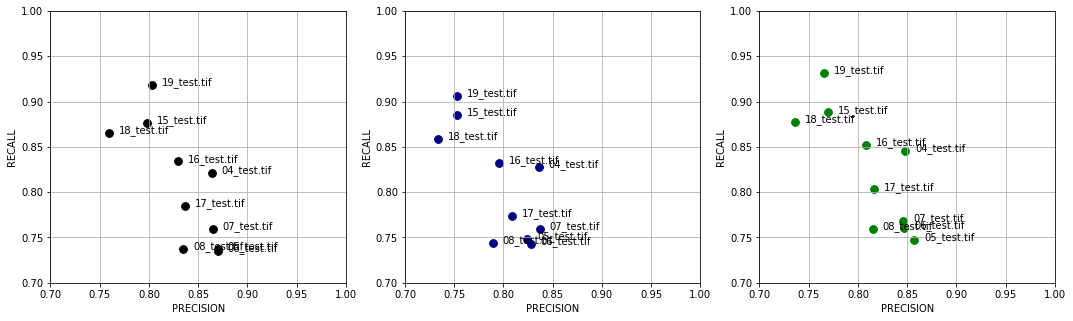

In [41]:
plt.rcParams["figure.figsize"] = [18,5]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.scatter(test['PRECISION'], test['RECALL'], color='black', s=60)
for i, txt in enumerate(test['ID']):
    ax1.annotate(txt, (test['PRECISION'].iloc[i]+0.01, test['RECALL'].iloc[i]))
ax1.set_xlabel('PRECISION')
ax1.set_ylabel('RECALL')
ax1.set_xlim((0.7, 1))
ax1.set_ylim((0.7, 1))
ax1.grid(True)

ax2.scatter(test1['PRECISION'], test1['RECALL'], color='navy', s=60)
for i, txt in enumerate(test1['ID']):
    ax2.annotate(txt, (test1['PRECISION'].iloc[i]+0.01, test1['RECALL'].iloc[i]))
ax2.set_xlabel('PRECISION')
ax2.set_ylabel('RECALL')
ax2.set_xlim((0.7, 1))
ax2.set_ylim((0.7, 1))
ax2.grid(True)

ax3.scatter(test2['PRECISION'], test2['RECALL'], color='green', s=60)
for i, txt in enumerate(test2['ID']):
    ax3.annotate(txt, (test2['PRECISION'].iloc[i]+0.01, test2['RECALL'].iloc[i]))
ax3.set_xlabel('PRECISION')
ax3.set_ylabel('RECALL')
ax3.set_xlim((0.7, 1))
ax3.set_ylim((0.7, 1))
ax3.grid(True)
plt.show()

### Test Accuracy

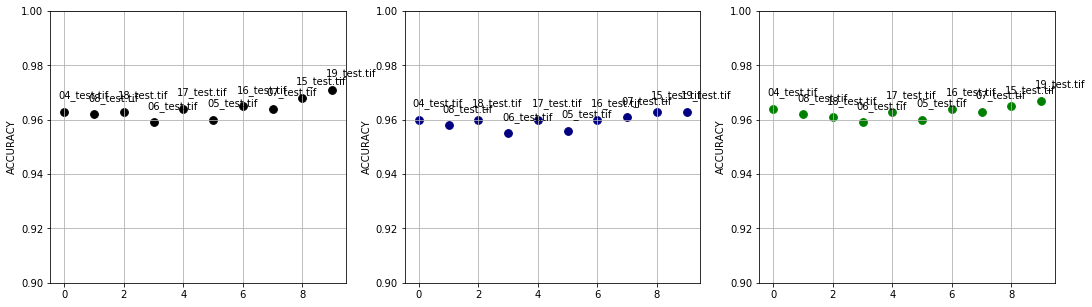

In [42]:
plt.rcParams["figure.figsize"] = [18,5]

fig, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.scatter(T_test, test['ACCURACY'], color='black', s=60)
for i, txt in enumerate(test['ID']):
    ax1.annotate(txt, (T_test[i], test['ACCURACY'].iloc[i]), xytext=(T_test[i]-0.2, test['ACCURACY'].iloc[i]+0.005))
ax1.set_ylabel('ACCURACY')
ax1.set_ylim((0.9, 1))
ax1.grid(True)

ax2.scatter(T_test1, test1['ACCURACY'], color='navy', s=60)
for i, txt in enumerate(test1['ID']):
    ax2.annotate(txt, (T_test1[i], test1['ACCURACY'].iloc[i]), xytext=(T_test1[i]-0.2, test1['ACCURACY'].iloc[i]+0.005))
ax2.set_ylabel('ACCURACY')
ax2.set_ylim((0.9, 1))
ax2.grid(True)

ax3.scatter(T_test2, test2['ACCURACY'], color='green', s=60)
for i, txt in enumerate(test1['ID']):
    ax3.annotate(txt, (T_test1[i], test2['ACCURACY'].iloc[i]), xytext=(T_test2[i]-0.2, test2['ACCURACY'].iloc[i]+0.005))
ax3.set_ylabel('ACCURACY')
ax3.set_ylim((0.9, 1))
ax3.grid(True)
plt.show()

### MST

In [109]:
import numpy as np
from commons.segmentation import AtureTest
from PIL import Image as IMG
from commons.IMAGE import SegmentedImage
import cv2
import utils.filter_utils as filutils
import utils.img_utils as imgutils
### DRIVE dataset path setup #####
Dirs = {}

Dirs['data']      = 'data'+sep+'DRIVE'+sep+'testing'

Dirs['images']    = Dirs['data'] +sep+ 'images'
Dirs['mask']      = Dirs['data'] +sep+ 'mask'
Dirs['truth']     = Dirs['data'] +sep+ 'manual1'
Dirs['segmented'] = Dirs['data'] +sep+ 'segmented_fishing 500'

for k, folder in Dirs.items():
    os.makedirs(folder, exist_ok=True)

def get_mask_file(file_name): 
    return file_name.split('_')[0] + '_test_mask.gif'
def get_ground_truth_file(file_name): 
    return file_name.split('_')[0] + '_manual1.gif'

input_image = '04_test.tif'
###### Path end #####
params = {'sk_threshold': 200,
          'alpha': 5.0,
          'orig_contrib': 0.2,
          'seg_threshold': 12}

In [110]:
img_obj = SegmentedImage()

img_obj.load_file(data_dir=Dirs['images'], file_name=input_image)
img_obj.working_arr = img_obj.image_arr[:,:,1]
img_obj.apply_clahe()
img_obj.res['orig'] = img_obj.working_arr

img_obj.working_arr = imgutils.get_image_as_array(Dirs['segmented'] +sep+ '04_test.tif.png', channels=1)
img_obj.load_mask(mask_dir=Dirs['mask'], fget_mask=get_mask_file, erode=True)
img_obj.load_ground_truth(gt_dir=Dirs['truth'], fget_ground_truth=get_ground_truth_file)
img_obj.apply_mask()
img_obj.generate_skeleton(threshold=params['sk_threshold'])
img_obj.generate_lattice_graph()

"generate_skeleton(__)" ... took 0.001 seconds
"generate_lattice_graph(__)" ... took 2.834 seconds


In [111]:
tester = AtureTest(out_dir=Dirs['segmented'])
tester.run(params=params, save_images=False, img_obj=img_obj)
img_obj.res['scores']

"run_segmentation(__)" ... took 132.326 seconds
Number of params combination tried: 1


{'Accuracy': 0.9656382591829312,
 'F1': 0.8205671963030955,
 'Precision': 0.7895778765913383,
 'Recall': 0.8540884232720564}

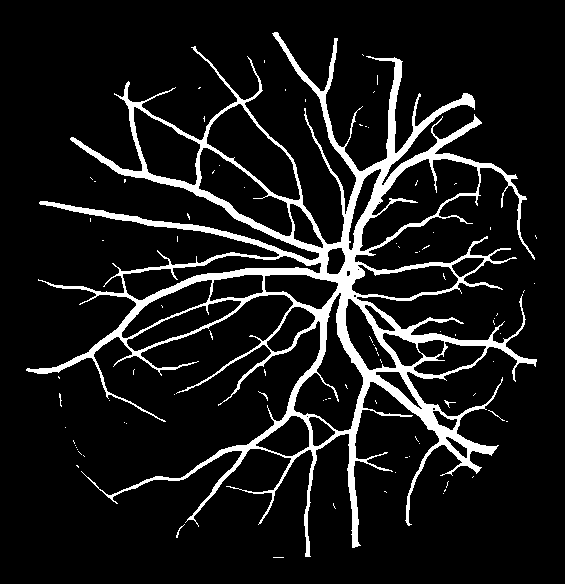

In [107]:
IMG.fromarray(img_obj.res['segmented'])

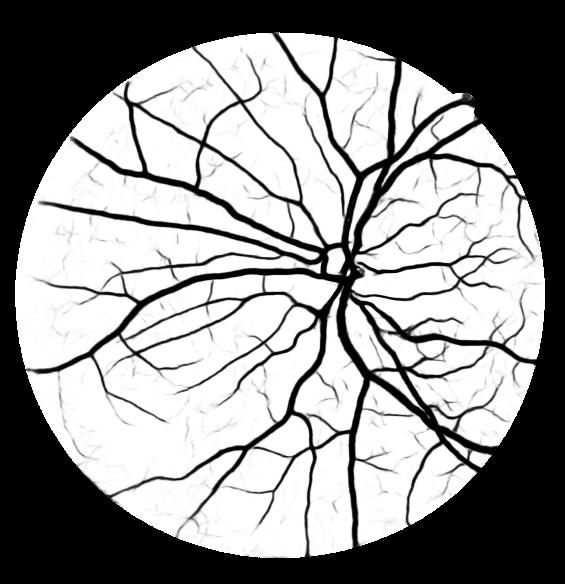

In [100]:
IMG.fromarray(img_obj.working_arr)

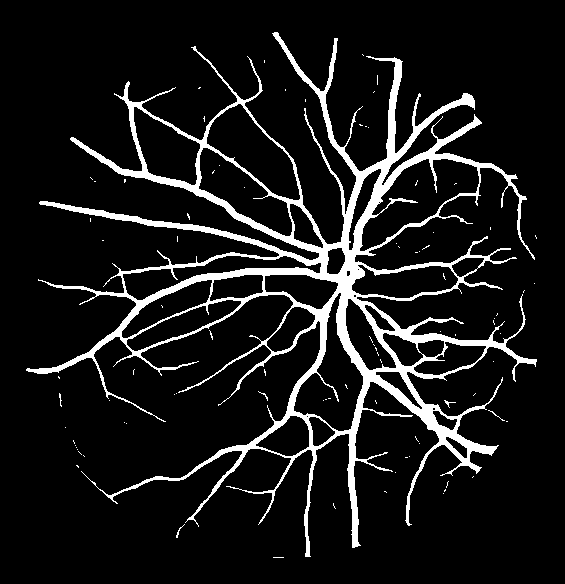

In [108]:
IMG.fromarray(img_obj.res['skeleton'])

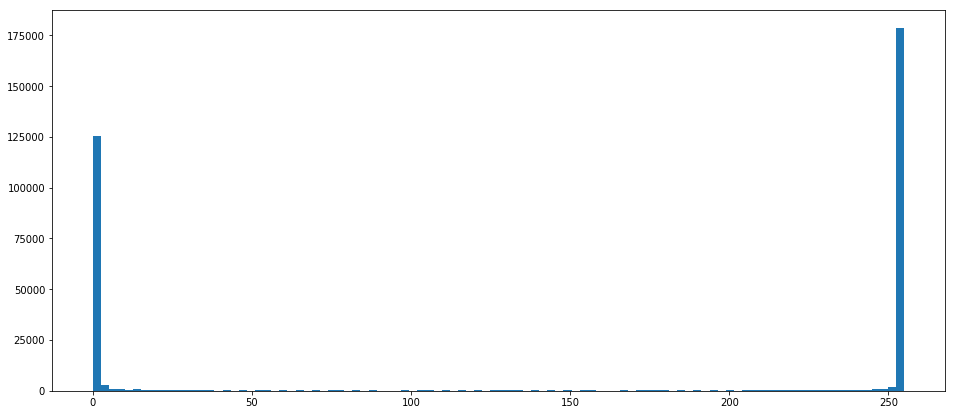

In [106]:
imgutils.histogram(img_obj.working_arr, bins=100)

In [80]:
arr = img_obj.working_arr.copy()

In [81]:
arr[arr>=150] = 255

In [82]:
arr[arr<150] = 0

In [83]:
for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
        if img_obj.mask[i,j] == 0:
            arr[i, j] =255

In [84]:
imgutils.get_praf1(255-arr, img_obj.ground_truth)

{'Accuracy': 0.9698811977209358,
 'F1': 0.832609061815732,
 'Precision': 0.851805900192997,
 'Recall': 0.8142584173420307}

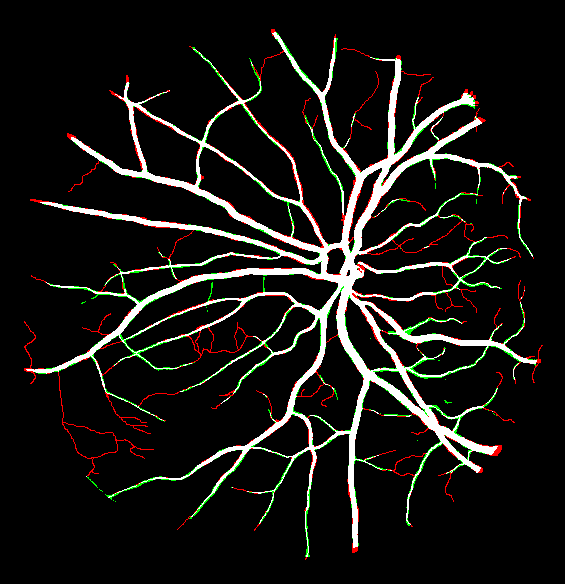

In [86]:
IMG.fromarray(imgutils.get_rgb_scores(255-arr, img_obj.ground_truth))

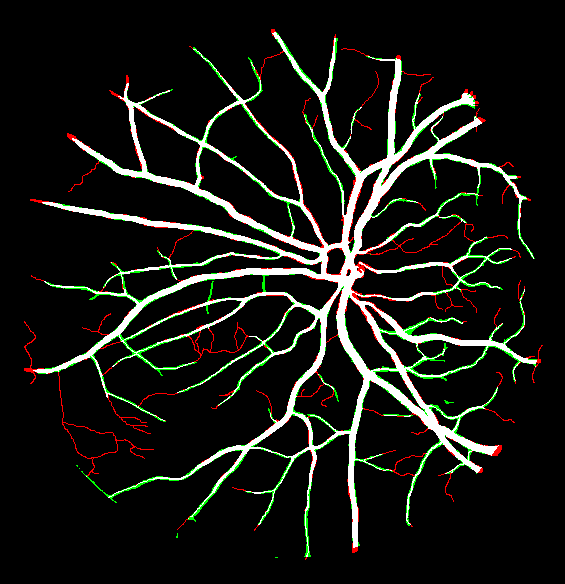

In [99]:
IMG.fromarray(imgutils.get_rgb_scores(img_obj.res['segmented'], img_obj.ground_truth))

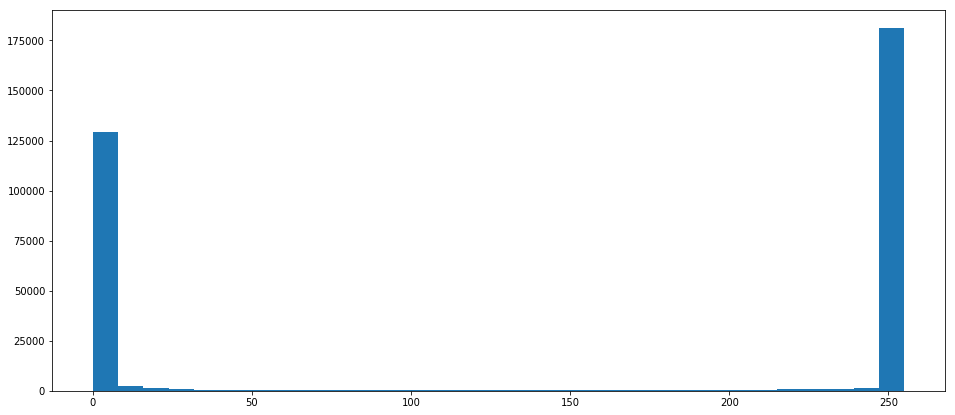

In [173]:
imgutils.histogram(img_obj.working_arr)

In [23]:
X = img_obj.working_arr
from sklearn.decomposition import NMF
model = NMF(n_components=10, init='random', random_state=0)
W = model.fit_transform(X)
H = model.components_

In [35]:
import random
random.random()

0.5830886374106672

In [50]:
random.uniform(0.1,1)

0.5458915783827468

In [51]:
random.uniform(0.5,1)

0.724745532394369

In [70]:
random.seed(1)

In [85]:
random.seed(2)
print(random.uniform(0.5,1))
print(random.uniform(0.1,1))

0.9780171359446247
0.9530447383534144


In [94]:
np.random.uniform(0,1, 2)

array([0.95195752, 0.61914878])

In [105]:
random.randint(100)/100

TypeError: randint() missing 1 required positional argument: 'b'

# 